In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [3]:
import tensorflow as tf
import matplotlib.pylab as plt
import time

2023-07-18 12:39:24.841662: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-18 12:39:27.795653: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-07-18 12:39:27.797758: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-07-18 12:39:27.797832: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [4]:
import sys
sys.path.append('../../Main/')

In [5]:
from load_model import LoadModel
from stag_mag import calculate_stag_mag

In [6]:
scratch_path = '/scratch/msmoss/RNN_sims/Rydbergs/N_256/New_Results/'
train_quantities_path = scratch_path + 'train_quantities/'

In [7]:
vmc1 = train_quantities_path + 'OneD_rnn/delta_13.455/seed_111/vmc_only/'
vmc1ckpts = scratch_path + 'OneD_rnn/delta_13.455/seed_111/vmc_only/'

In [8]:
start_time = time.time()
mvmc1,evmc1,_,_ = LoadModel(vmc1,vmc1ckpts)
elapsed_time = time.time() - start_time
print(elapsed_time)

2023-07-18 12:39:35.138253: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-07-18 12:39:35.138477: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (gra615): /proc/driver/nvidia/version does not exist
2023-07-18 12:39:35.140799: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Training a one-D RNN wave function with 32 hidden units and shared weights.
The total number of parameters is 3522
Checkpoint found.
Restored from /scratch/msmoss/RNN_sims/Rydbergs/N_256/New_Results/OneD_rnn/delta_13.455/seed_111/vmc_only/ckpt-1000.
The final step was 10000.
358.5322756767273


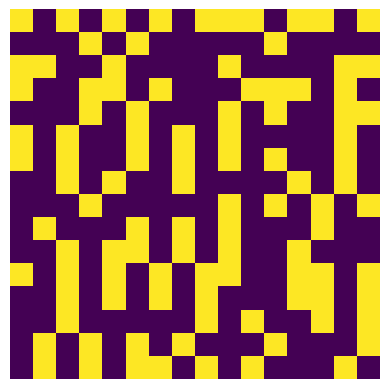

0.05078125


In [10]:
sample1,_ = mvmc1.sample(1) 
_,_,sm1,_ = calculate_stag_mag(16,16,sample1.numpy())
sample1 = np.reshape(sample1.numpy(),(16,16))
plt.imshow(sample1)
plt.axis('off')
plt.show()
print(sm1)

In [11]:
vmc2 = train_quantities_path + 'TwoD_rnn/delta_13.455/seed_111/vmc_only/'
vmc2ckpts = scratch_path + 'TwoD_rnn/delta_13.455/seed_111/vmc_only/'

In [12]:
start_time = time.time()
mvmc2,evmc2,_,_ = LoadModel(vmc2,vmc2ckpts)
elapsed_time = time.time() - start_time
print(elapsed_time)

Training a two-D RNN wave function with 16 hidden units and shared weights = True.
The sum of params is 4674
Checkpoint found.
Restored from /scratch/msmoss/RNN_sims/Rydbergs/N_256/New_Results/TwoD_rnn/delta_13.455/seed_111/vmc_only/ckpt-1000.
The final step was 10000.
5.127925872802734


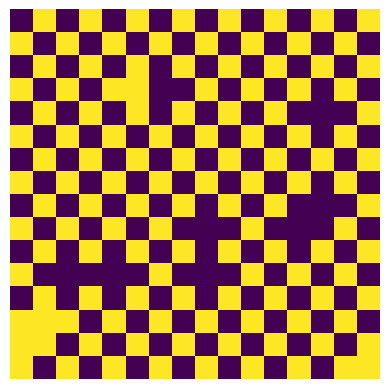

0.453125


In [13]:
sample2,_ = mvmc2.sample(1) 
_,_,sm2,_ = calculate_stag_mag(16,16,sample2.numpy())
sample2 = np.reshape(sample2.numpy(),(16,16))
plt.imshow(sample2)
plt.axis('off')
plt.show()
print(sm2)

In [14]:
hybrid1 = train_quantities_path + 'OneD_rnn/delta_13.455/seed_111/hybrid_train/1000_ds/lr_5e-05/'
hybrid1ckpts = scratch_path + 'OneD_rnn/delta_13.455/seed_111/hybrid_train/1000_ds/lr_5e-05/'

In [ ]:
start_time = time.time()
mh1,eh1,_,_ = LoadModel(hybrid1,hybrid1ckpts)
elapsed_time = time.time() - start_time
print(elapsed_time)

Training a one-D RNN wave function with 32 hidden units and shared weights.


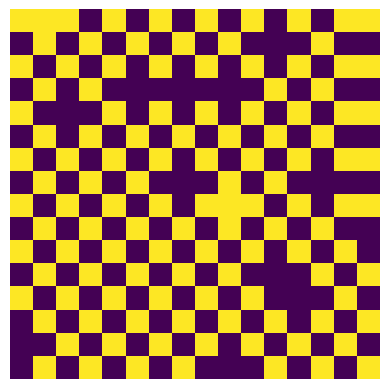

0.41015625


In [9]:
sample1h,_ = mh1.sample(1) 
_,_,sm1h,_ = calculate_stag_mag(16,16,sample1h.numpy())
sample1h = np.reshape(sample1h.numpy(),(16,16))
plt.imshow(sample1h)
plt.axis('off')
plt.show()
print(sm1h)

In [10]:
hybrid2 = train_quantities_path + 'TwoD_rnn/delta_13.455/seed_111/hybrid_train/100_ds/lr_0.001/'
hybrid2ckpts = scratch_path + 'TwoD_rnn/delta_13.455/seed_111/hybrid_train/100_ds/lr_0.001/'

In [11]:
start_time = time.time()
mh2,eh2,_,_ = LoadModel(hybrid2,hybrid2ckpts)
elapsed_time = time.time() - start_time
print(elapsed_time)

Training a two-D RNN wave function with 16 hidden units and shared weights = True.
The sum of params is 4674
Checkpoint found.
Restored from /scratch/msmoss/RNN_sims/Rydbergs/N_256/New_Results/TwoD_rnn/delta_13.455/seed_111/hybrid_train/100_ds/lr_0.001/ckpt-1000.
The final step was 10000.
11.46331000328064


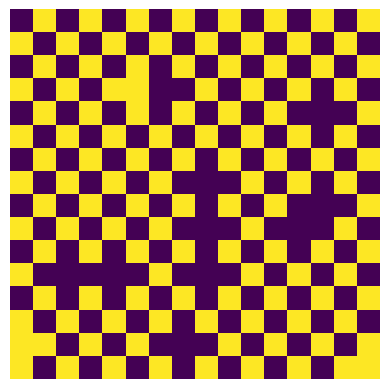

0.44921875


In [12]:
sample2h,_ = mh2.sample(1) 
_,_,sm2h,_ = calculate_stag_mag(16,16,sample2h.numpy())
sample2h = np.reshape(sample2h.numpy(),(16,16))
plt.imshow(sample2h)
plt.axis('off')
plt.show()
print(sm2h)